# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2]:
titanic = pd.read_csv("./train.csv")

### Step 4. Set PassengerId as the index 

In [3]:
titanic = titanic.set_index("PassengerId")

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [5]:
data = titanic[["Sex"]].value_counts().reset_index()
data.columns = ["Sex", "Value_counts"]

In [6]:
data

,Sex,Value_counts
0,male,577
1,female,314


In [7]:
data = data.assign(
    Percent=lambda df_: (df_.Value_counts / df_.Value_counts.sum()) * 100
)

In [8]:
data

,Sex,Value_counts,Percent
0,male,577,64.758698
1,female,314,35.241302


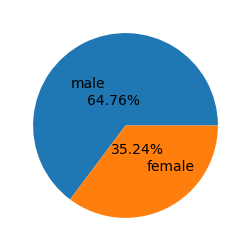

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.pie(
    data.Percent, autopct="%.2f%%", pctdistance=0.3, labels=data.Sex, labeldistance=0.5
)

plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

<Axes: xlabel='Age', ylabel='Fare'>

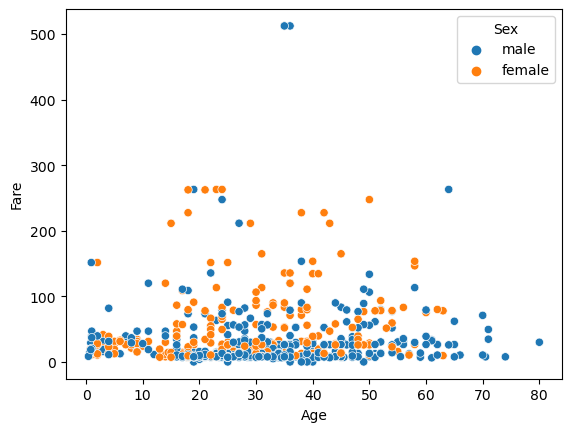

In [10]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex")

### Step 7. How many people survived?

In [11]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

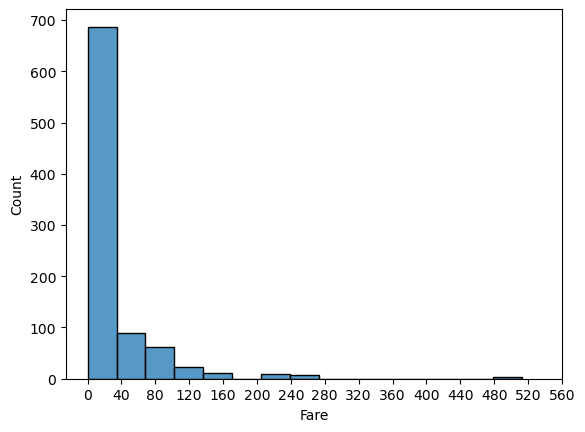

In [12]:
ax = sns.histplot(data=titanic, x="Fare", bins=15)
ax.set_xticks(range(0, 600, 40))

plt.show(ax)

- A different approach

In [13]:
titanic.Fare.max()

512.3292

In [14]:
bins = range(0, 525, 25)
data = (
    pd.DataFrame(pd.cut(titanic.Fare, bins))
    .reset_index()
    .groupby("Fare")
    .count()
    .reset_index()
)

In [15]:
data.columns = ["Fare_bin", "Passenger_count"]

In [16]:
data.head(3)

,Fare_bin,Passenger_count
0,"(0, 25]",542
1,"(25, 50]",174
2,"(50, 75]",63


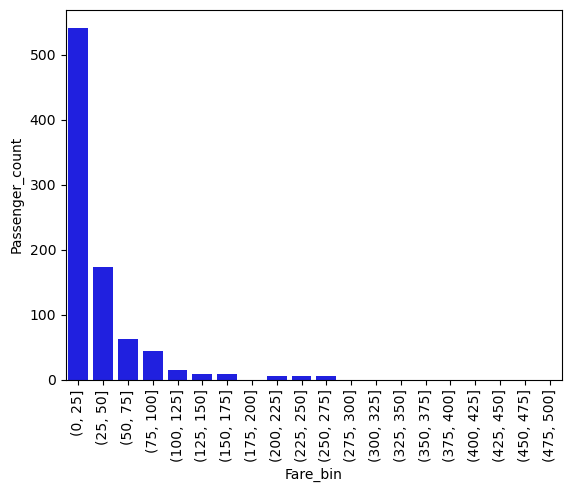

In [18]:
ax = sns.barplot(data=data, x=data.Fare_bin, y=data.Passenger_count, color="blue")
xticks = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

ax.set_xticks(xticks, xtick_labels, rotation=90)

plt.show()

### BONUS: Create your own question and answer it.